<center><img src="images/unbalanced.png" width="55%"/></center>


By The End Of This Session You Should Be Able To:
----

- List strategies for handling unbalanced data.
- Explain advantages and disadvantages of each strategy.

<center><h2>All real-world data is dirty</h2></center>

<center><h2>Most real-world data is unbalanced</h2></center> 

What are Techniques to Handle Class Imbalances?
------

1. Ignore it
2. Go get more data
3. Resample
4. Pick an appropriate evaluation metrics
5. Pick an appropriate algorithm
6. Pick an appropriate loss function

1) Ignore it. 
-----

It might not matter (seriously). 

Small-ish differences at large scale might not effect business outcomes.

2) Go get more data from the smaller classes.
----

Pay the money and time to get more data!

3) Resample
------

What are the ways to sample to rebalance class membership?

1. Over sample minority group
2. Under sample majority group
3. Representative sampling of both groups

<center><img src="http://api.ning.com/files/vvHEZw33BGqEUW8aBYm4epYJWOfSeUBPVQAsgz7aWaNe0pmDBsjgggBxsyq*8VU1FdBshuTDdL2-bp2ALs0E-0kpCV5kVdwu/imbdata.png" width="65%"/></center>

In [2]:
reset -fs

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

palette = "Dark2"
%matplotlib inline

In [4]:
# Let's explore imblearn package
try:
    import imblearn
except ImportError:
    import pip
    import sys
    import subprocess
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'imblearn'])
    import imblearn

In [5]:
from collections import Counter
from sklearn.datasets import make_classification

X, y = make_classification(n_classes=3, class_sep=2, n_informative=3, n_redundant=1, flip_y=0,
                           weights=[0.1, 0.2, 0.7])

print(f"Original dataset shape: {sorted(Counter(y).items())}")

Original dataset shape: [(0, 10), (1, 20), (2, 70)]


In [6]:
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler(random_state=42)

X_res, y_res = rus.fit_resample(X, y)

print(f"Resampled dataset shape: {sorted(Counter(y_res).items())}")

Resampled dataset shape: [(0, 10), (1, 10), (2, 10)]


Source: https://imbalanced-learn.org/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html

SMOTE,  Synthetic Minority Over-sampling Technique
-----

> Often real-world data sets are predominately composed of “normal” examples with only a small percentage of “abnormal” or “interesting” examples. It is also the case that the cost of misclassifying an abnormal (interesting) example as a normal example is often much higher than the cost of the reverse error.

 >  This paper shows that a combination of our method of over-sampling the minority (abnormal) class and under-sampling the majority (normal) class can achieve better classifier performance (in ROC space) than only under-sampling the majority class.

[SMOTE: Synthetic Minority Over-sampling Technique paper](https://jair.org/index.php/jair/article/view/10302/24590)

SMOTE
-----

<center><img src="https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_2.png" width="75%"/></center>

Synthesises new minority instances between existing (real) minority instances

Source:  http://rikunert.com/SMOTE_explained

In [7]:
from imblearn.over_sampling import SMOTE

4) Pick an appropriate evaluation metrics. 
----

Avoid accuracy. 

Use F-score.

Use [F-score breakdowns by class with `classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

Learn more: 
- https://medium.com/coinmonks/practical-tips-for-class-imbalance-in-binary-classification-6ee29bcdb8a7
- https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba

5) Pick a robust algorithm
----

 For example, SVM is very robust to class Imbalances.

In [8]:
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1_000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

In [9]:
from sklearn import svm

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

NameError: name 'xlim' is not defined

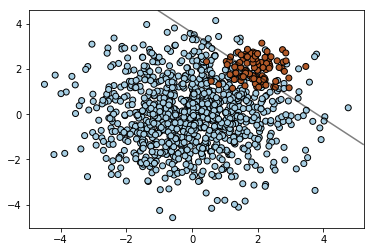

In [12]:
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')


# plot the decision functions for both classifiers
ax = plt.gca(); xlim = ax.get_xlim(); ylim = ax.get_ylim()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

Source: 

- https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html
-https://pdfs.semanticscholar.org/239b/2210b3fbc1f4b8246437a88a668bf9a0d2c0.pdf

6) Change the loss function
----



What is the difference between error and loss?
-----

Error is a mistake.

Loss is a __weighted__ mistake.

Thus, weight mistakes for smaller classes more highly than mistakes for larger classes.

For example, weighted cross entropy.

In [13]:
# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y);

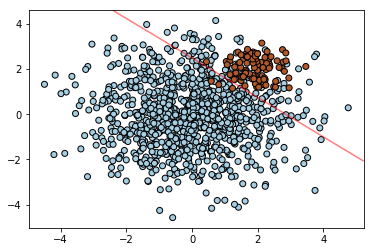

In [14]:
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# plot the decision functions for both classifiers
ax = plt.gca(); xlim = ax.get_xlim();ylim = ax.get_ylim()

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])
plt.show()

In [16]:
# Random Forest™ also takes weighted classes
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight={1: 10}).fit(X, y)

Unbalanced data also applies to Features
----------

If we want to split on a feature, it would be best if both features are relatively balanced.



Unbalanced data also applies to Regression
----------

In Regression, we want to predict a value. It is best if all possible values are equally represented.

You can:

- Filter data without enough samples (aka, ingore)
- Resample data
- You fit more appropriate algorithms (e.g., Bayesian Regression)

Summary
------

- Unbalanced data is common
- There are a variety of strategies to handle it:
    1. Ignore it
    2. Go get more data
    3. Resample
    4. Pick an appropriate evaluation metrics, algorithm, and loss function